In [3]:
import pandas as pd
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_rows',200)
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import numpy as np

In [4]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [5]:
df = pd.read_excel("hospital_data_sample.xlsx", sheet_name='Sheet1')
# wait = pd.read_excel(df, 'Sheet1')

In [6]:
df.shape

(29998, 19)

In [7]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID,Wait Time,Wait Minutes,Day of Week,Hour,Consultation Period,Process Period,Consultation Percentage,Process Percentage
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001,00:54:01,54.016667,Monday,8,42.150000,11.866667,0.780315,0.219685
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002,02:04:51,124.850000,Wednesday,19,103.333333,21.516667,0.827660,0.172340
2,2019-11-02,660,$-,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003,01:19:36,79.600000,Saturday,10,69.550000,10.050000,0.873744,0.126256
3,2019-11-06,600,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004,01:19:28,79.466667,Wednesday,9,77.266667,2.200000,0.972315,0.027685
4,2019-11-01,591.6,$-,12,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005,00:50:33,50.550000,Friday,11,50.466667,0.083333,0.998351,0.001649


In [8]:
df.isnull().sum()

Date                       0
 Medication Revenue        0
  Lab Cost                 0
 Consultation Revenue      0
Doctor Type                0
Financial Class            0
Patient Type               0
Entry Time                 0
Post-Consultation Time     0
Completion Time            0
Patient ID                 0
Wait Time                  0
Wait Minutes               0
Day of Week                0
Hour                       0
Consultation Period        0
Process Period             0
Consultation Percentage    0
Process Percentage         0
dtype: int64

In [9]:
df.dtypes

Date                       datetime64[ns]
 Medication Revenue                object
  Lab Cost                         object
 Consultation Revenue              object
Doctor Type                        object
Financial Class                    object
Patient Type                       object
Entry Time                         object
Post-Consultation Time             object
Completion Time                    object
Patient ID                         object
Wait Time                          object
Wait Minutes                      float64
Day of Week                        object
Hour                                int64
Consultation Period               float64
Process Period                    float64
Consultation Percentage           float64
Process Percentage                float64
dtype: object

In [10]:
def unnivariate_cat(variable):
    plt.figure(figsize=(12,6))
    sns.countplot(variable, data=df, palette= 'bright', order= df[variable].value_counts().index)
    plt.title('Analysis of '+ '%s' %variable, weight='heavy', fontsize=15)
    plt.xlabel(variable)
    plt.ylabel('Clients')
    plt.show()

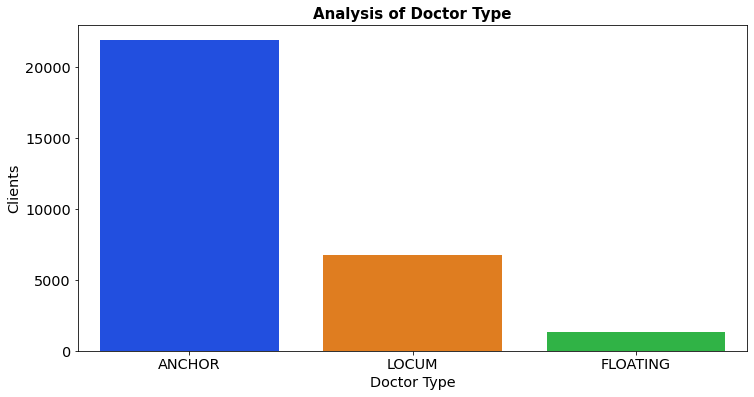

In [11]:
unnivariate_cat('Doctor Type')

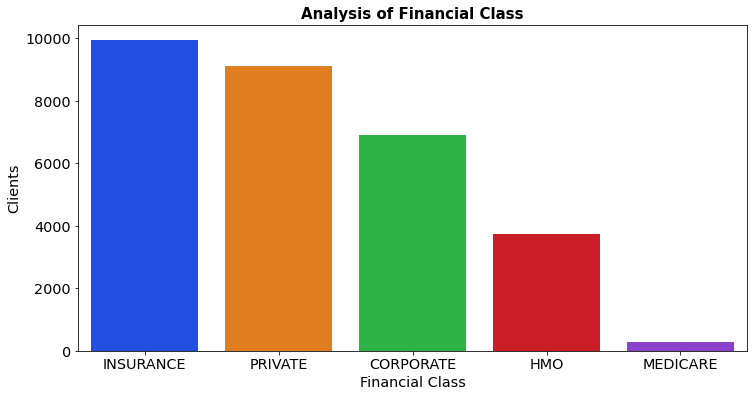

In [12]:
unnivariate_cat('Financial Class')

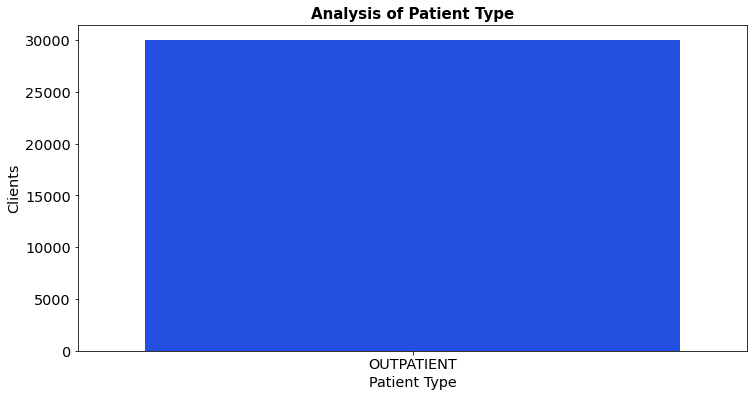

In [13]:
unnivariate_cat('Patient Type')

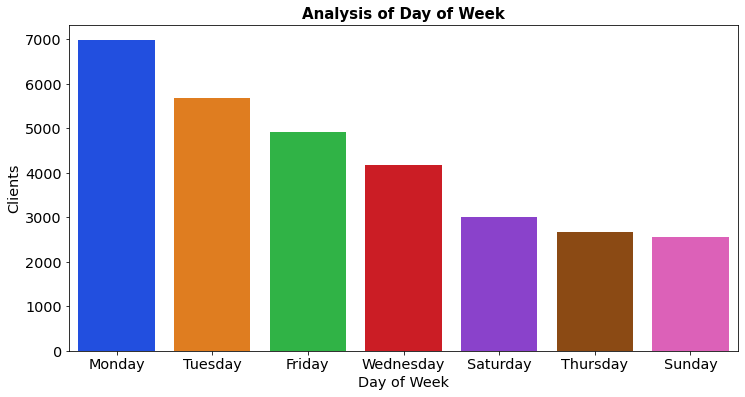

In [14]:
unnivariate_cat('Day of Week')

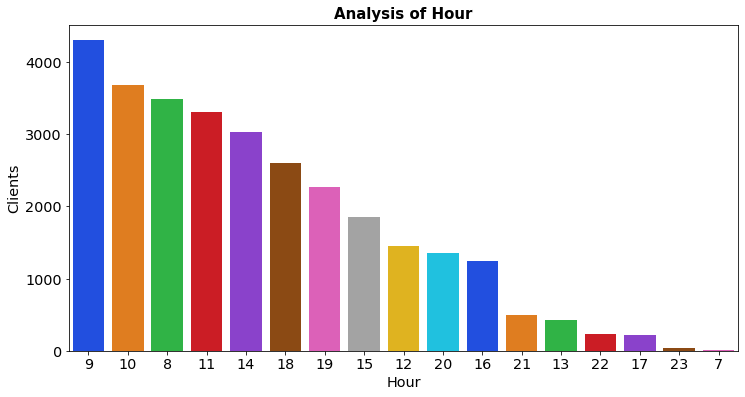

In [15]:
unnivariate_cat('Hour')

In [16]:
def unnivariate_cont(variable):
    plt.figure(figsize=(12,6))
    sns.distplot(df[variable],color='tab:blue')
    plt.title('Distribution of '+ '%s' %variable, weight='heavy', fontsize=15)
    plt.xlabel(variable)
    plt.ylabel('Normal distribution for clients')
    plt.show()

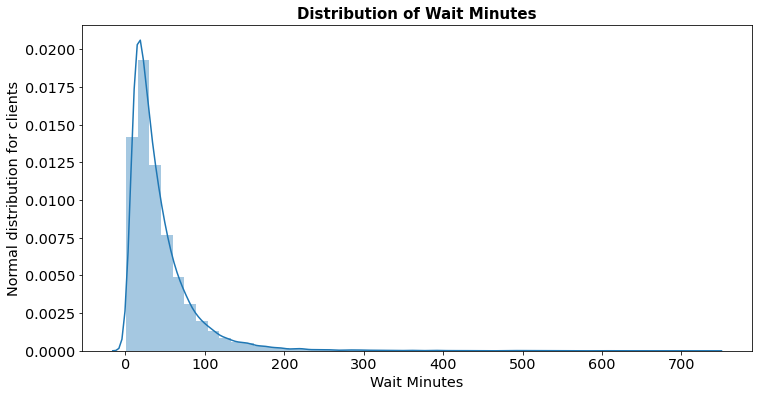

In [17]:
unnivariate_cont('Wait Minutes')

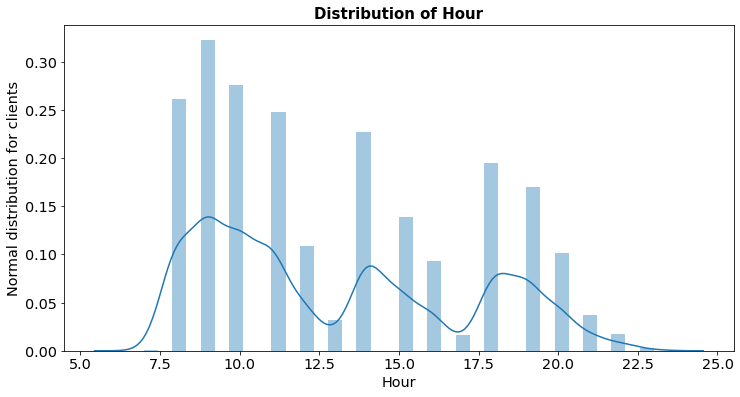

In [18]:
unnivariate_cont('Hour')

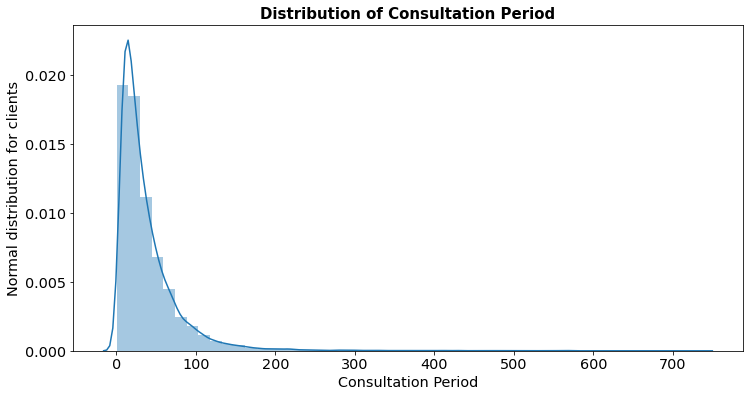

In [19]:
unnivariate_cont('Consultation Period')

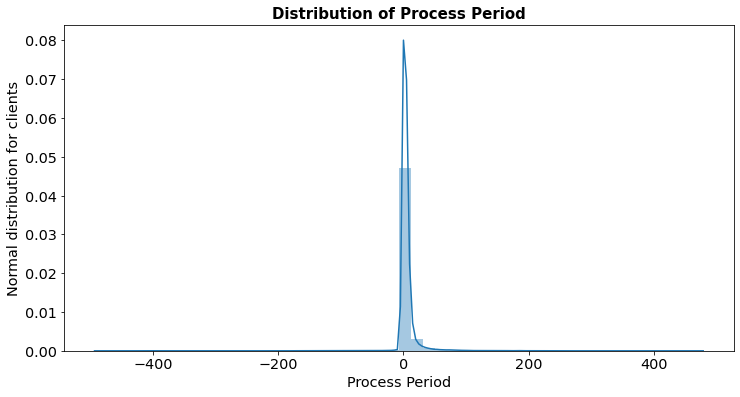

In [20]:
unnivariate_cont('Process Period')

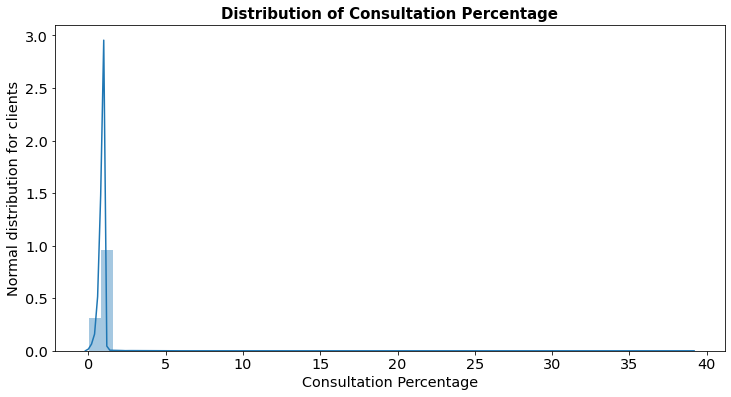

In [21]:
unnivariate_cont('Consultation Percentage')

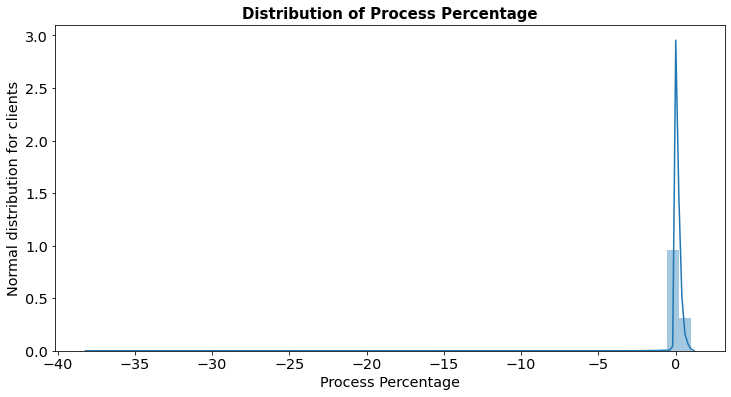

In [22]:
unnivariate_cont('Process Percentage')

In [23]:
def bivariate_cat_cat(variable,var_hue):
    plt.figure(figsize=(15,6))
    sns.countplot(variable,hue=var_hue, data=df, palette= 'bright', order= df[variable].value_counts().index, hue_order=df[var_hue].value_counts().index)
    plt.title('Analysis of '+ '%s' %variable , weight='heavy', fontsize=15)
    plt.xlabel(variable)
    plt.ylabel('Clients')
    plt.show()

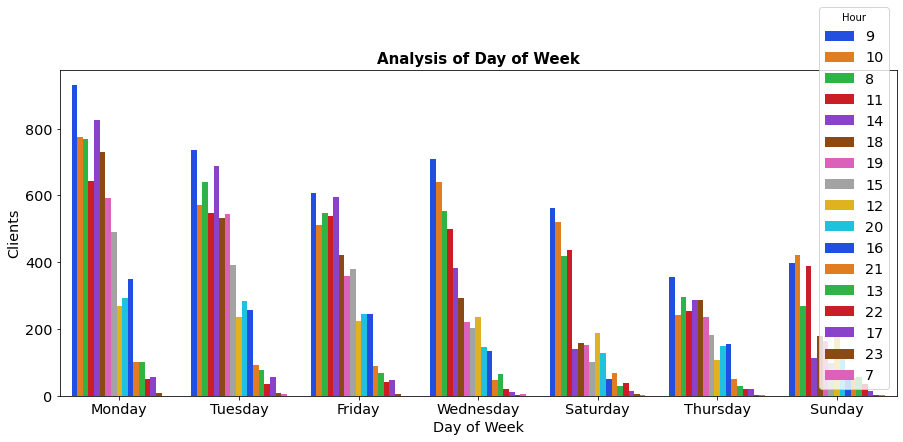

In [24]:
bivariate_cat_cat('Day of Week','Hour')

In [25]:
def bivariate_cat_cont(var_cat,var_cont):
    plt.figure(figsize=(13,8))
    sns.boxplot(x=var_cat,y=var_cont, data=df, palette='bright', order= df[var_cat].value_counts().index)
    plt.title('Analysis of '+ '%s' %var_cat, weight='heavy', fontsize=15)
    plt.xlabel(var_cat)
    plt.ylabel('%s' %var_cont+' for defaulters')
    plt.show()

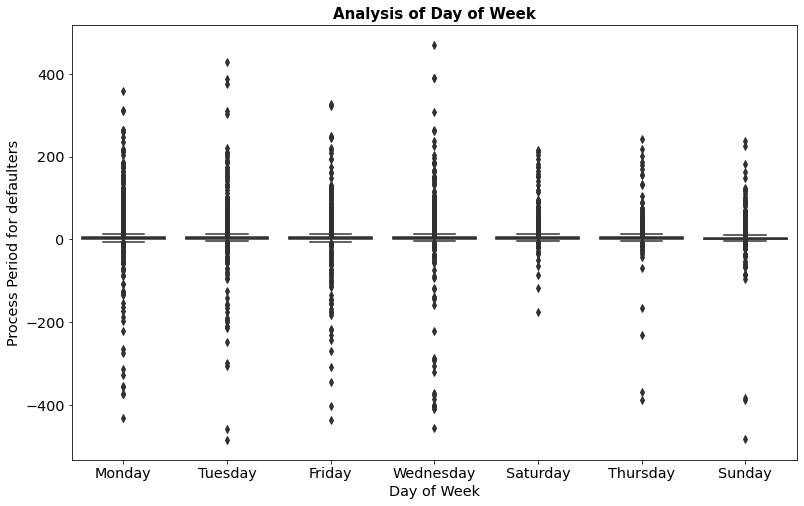

In [26]:
bivariate_cat_cont('Day of Week','Process Period')

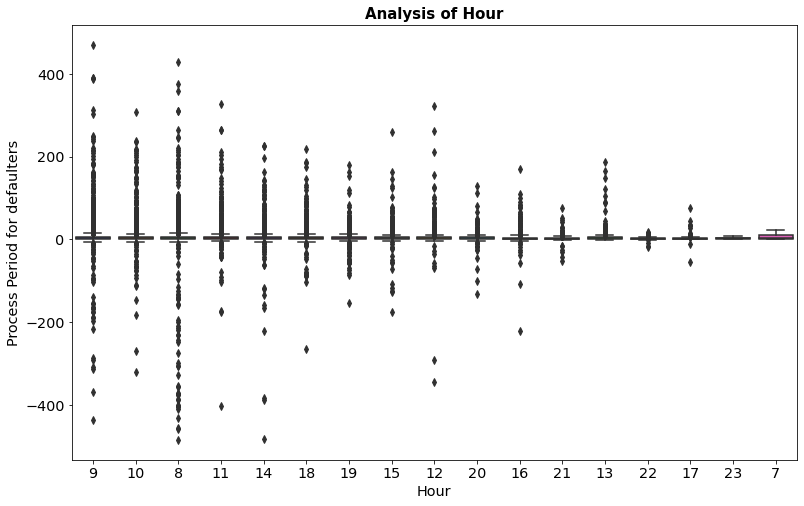

In [27]:
bivariate_cat_cont('Hour','Process Period')

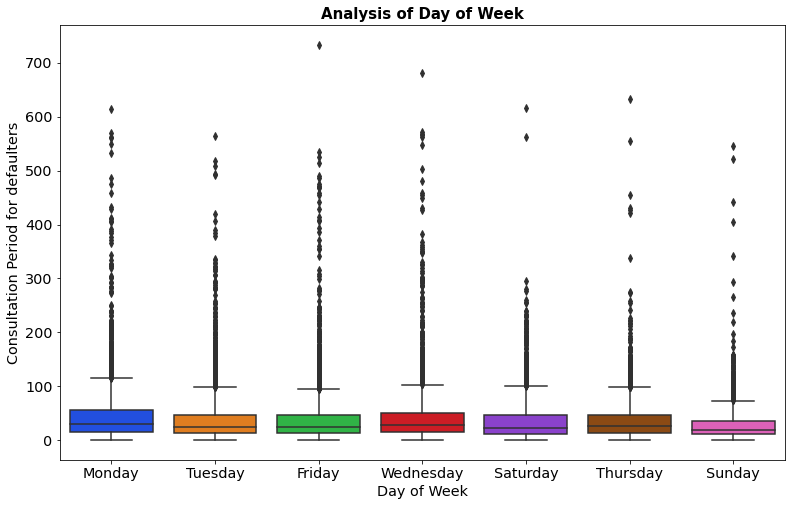

In [28]:
bivariate_cat_cont('Day of Week','Consultation Period')

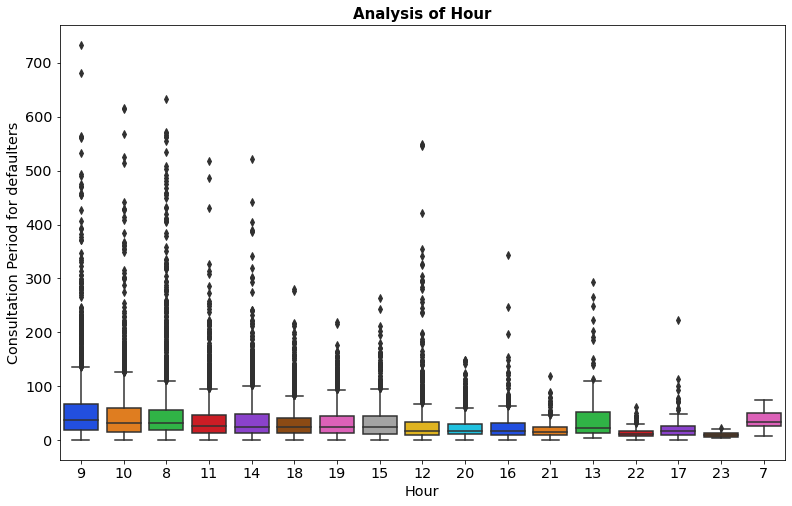

In [29]:
bivariate_cat_cont('Hour','Consultation Period')

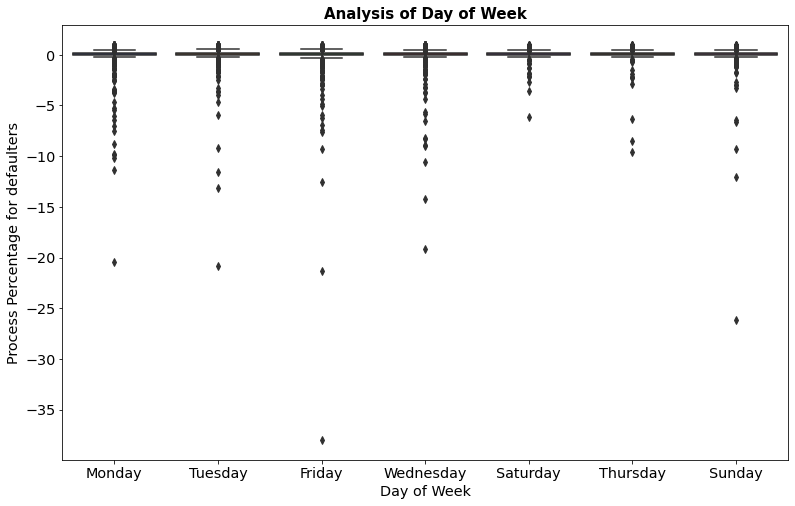

In [30]:
bivariate_cat_cont('Day of Week','Process Percentage')

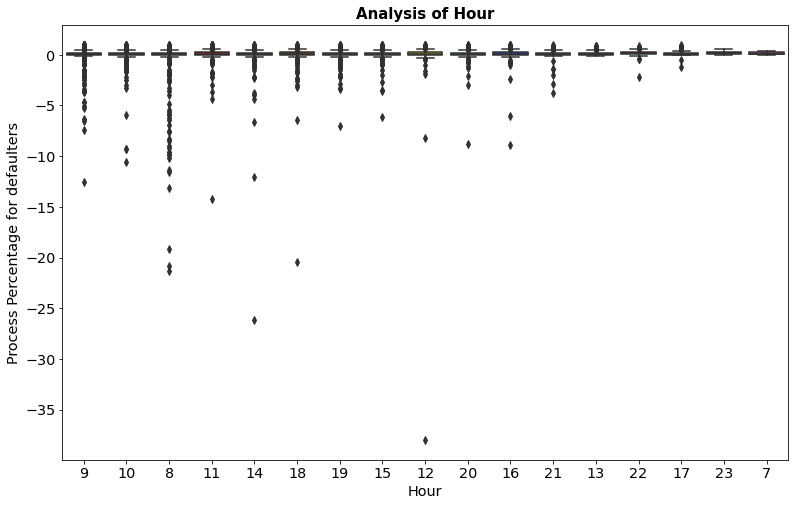

In [31]:
bivariate_cat_cont('Hour','Process Percentage')

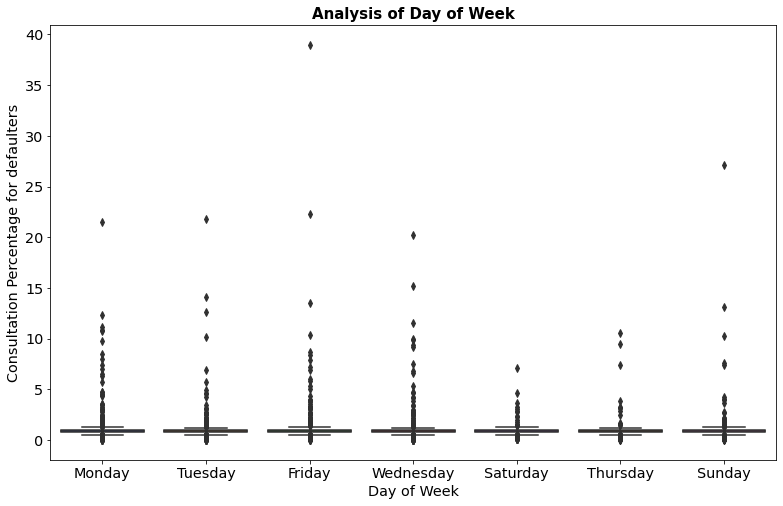

In [32]:
bivariate_cat_cont('Day of Week','Consultation Percentage')

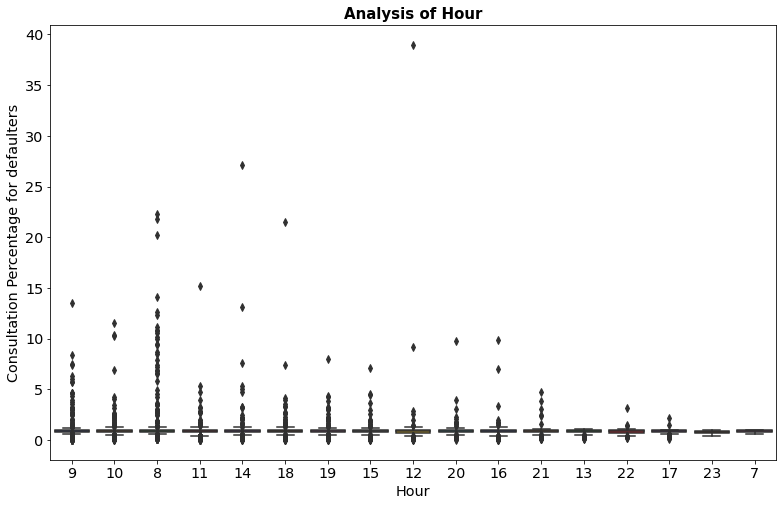

In [33]:
bivariate_cat_cont('Hour','Consultation Percentage')

In [36]:
def bivariate_cont_cont(var_cont1,var_cont2):   
    plt.figure(figsize=(13,7))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=var_cont1,y=var_cont2, data=df, palette='bright')
    plt.title('Analysis of '+ '%s' %var_cont1, weight='heavy', fontsize=15)
    plt.ylabel('Analysis of '+ '%s' %var_cont2)
    xIQR=1.5*(df[var_cont1].quantile(.75)-df[var_cont1].quantile(.25))
    xlowerlim=df[var_cont1].quantile(.25)-xIQR
    xupperlim=df[var_cont1].quantile(.75)+xIQR
    yIQR=1.5*(df[var_cont2].quantile(.75)-df[var_cont2].quantile(.25))
    ylowerlim=df[var_cont2].quantile(.25)-yIQR
    yupperlim=df[var_cont2].quantile(.75)+yIQR
    plt.show()

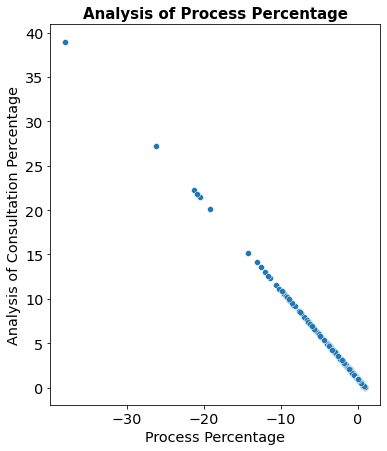

In [37]:
bivariate_cont_cont('Process Percentage','Consultation Percentage')

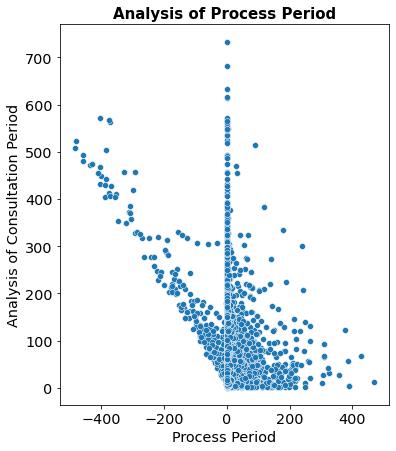

In [38]:
bivariate_cont_cont('Process Period','Consultation Period')

In [65]:
df = df.replace(['Monday', 'Tuesday',
            'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [1, 2, 3, 4, 5, 6, 7])
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID,Wait Time,Wait Minutes,Day of Week,Hour,Consultation Period,Process Period,Consultation Percentage,Process Percentage,Wait
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001,00:54:01,54.016667,1,8,42.150000,11.866667,0.780315,0.219685,True
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002,02:04:51,124.850000,3,19,103.333333,21.516667,0.827660,0.172340,True
2,2019-11-02,660,$-,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003,01:19:36,79.600000,6,10,69.550000,10.050000,0.873744,0.126256,True
3,2019-11-06,600,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004,01:19:28,79.466667,3,9,77.266667,2.200000,0.972315,0.027685,True
4,2019-11-01,591.6,$-,12,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005,00:50:33,50.550000,5,11,50.466667,0.083333,0.998351,0.001649,True


In [66]:
def corr_heatmap(variable):
    plt.figure(figsize=(13,9))
    corr_lation = variable.corr()
    masking=np.triu(np.ones(corr_lation.shape)).astype(np.bool)
    sns.heatmap(corr_lation,annot=True,mask=masking,linewidths=.10,cmap="Spectral")
    plt.show()
    #Steps to obtain the top correlation.
    indices = np.where(corr_lation > -1)
    indices = [(corr_lation.index[x], corr_lation.columns[y],abs(corr_lation.iloc[x,y])) for x, y in zip(*indices) if x != y and x < y]
    all=sorted(indices, key=lambda x: x[2],reverse=True)
    print("Ten Correlations are:")
    for i in range(0,6):
        print('%d. '%(i+1)+all[i][0]+' and '+all[i][1])

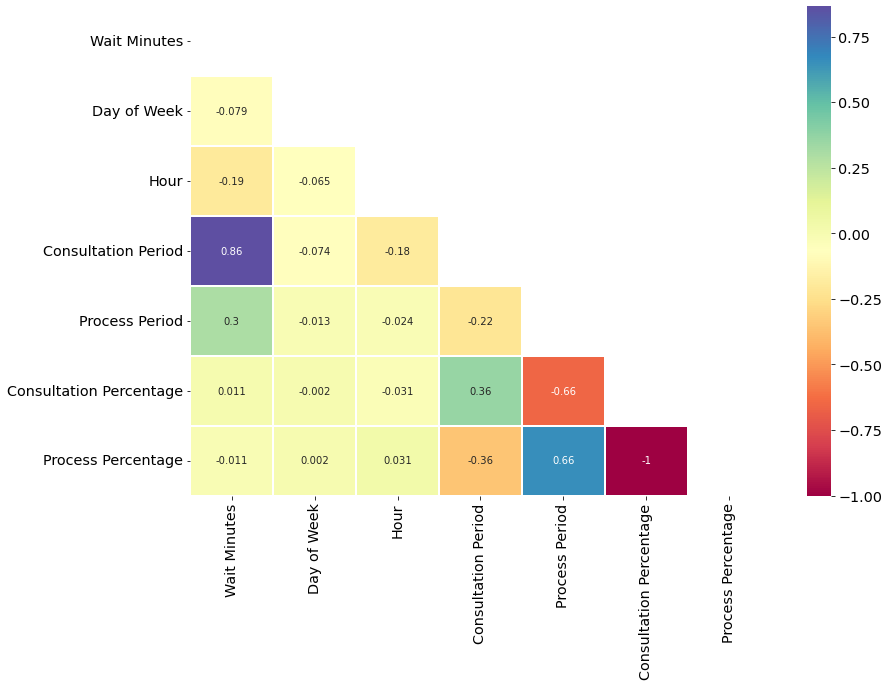

Ten Correlations are:
1. Wait Minutes and Consultation Period
2. Process Period and Consultation Percentage
3. Process Period and Process Percentage
4. Consultation Period and Process Percentage
5. Consultation Period and Consultation Percentage
6. Wait Minutes and Process Period


In [67]:
corr_heatmap(df[['Patient ID', 'Wait Minutes', 'Day of Week', 'Hour', 'Consultation Period', 'Process Period', 'Consultation Percentage', 'Process Percentage']])

In [73]:
df['Wait'] = np.where(df['Wait Minutes'] > 15, 1, 0)
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID,Wait Time,Wait Minutes,Day of Week,Hour,Consultation Period,Process Period,Consultation Percentage,Process Percentage,Wait
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001,00:54:01,54.016667,1,8,42.150000,11.866667,0.780315,0.219685,1
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002,02:04:51,124.850000,3,19,103.333333,21.516667,0.827660,0.172340,1
2,2019-11-02,660,$-,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003,01:19:36,79.600000,6,10,69.550000,10.050000,0.873744,0.126256,1
3,2019-11-06,600,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004,01:19:28,79.466667,3,9,77.266667,2.200000,0.972315,0.027685,1
4,2019-11-01,591.6,$-,12,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005,00:50:33,50.550000,5,11,50.466667,0.083333,0.998351,0.001649,1


In [74]:
X = pd.DataFrame(df[['Day of Week', 'Hour', 'Consultation Period', 'Process Period', 'Consultation Percentage', 'Process Percentage']])
Y = df['Wait']

In [75]:
obj_cols = []
col = X.columns
for i in col:
    if X[i].dtype == 'object':
        obj_cols.append(i)
print(obj_cols)

[]


In [76]:
X.columns

Index(['Day of Week', 'Hour', 'Consultation Period', 'Process Period',
       'Consultation Percentage', 'Process Percentage'],
      dtype='object')

In [77]:
Y.value_counts()

1    24288
0     5710
Name: Wait, dtype: int64

In [89]:
Y = df['Wait Minutes']
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
lin_reg_model = LinearRegression() 
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [90]:
training_data_prediction = lin_reg_model.predict(X_train) 

In [91]:
# R squared Error 
train_error_score = metrics.r2_score(Y_train, training_data_prediction) 
print("R squared Error - Training : ", train_error_score) 

R squared Error - Training :  1.0


In [92]:
Y_pred = lin_reg_model.predict(X_test) 

In [93]:
test_error_score = metrics.r2_score(Y_test, Y_pred) 
print("R squared Error - Test: ", test_error_score) 

R squared Error - Test:  1.0


<AxesSubplot:xlabel='Wait Minutes'>

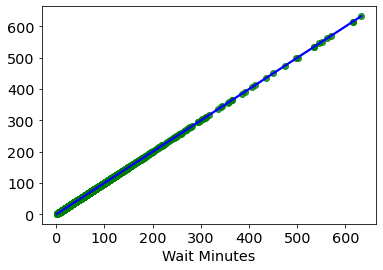

In [94]:
sns.regplot(Y_test, Y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"}) 

In [96]:
Y = df['Wait']
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [97]:
yprediction = logistic.predict(X_test)
print('accuracy on testing dataset: {:.3f}'.format(logistic.score(X_test, y_test)))

accuracy on testing dataset: 1.000


In [98]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, yprediction)

In [99]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, yprediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1664
           1       1.00      1.00      1.00      7336

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



In [100]:
from sklearn.tree import DecisionTreeClassifier
nb = DecisionTreeClassifier()
nb.fit(X_train, y_train)
# X_test_dtm class predictions are conducted
yprediction = nb.predict(X_test)

# class prediction accuracies are calculated
from sklearn import metrics
print(metrics.accuracy_score(y_test, yprediction))

# confusion matrix is bulit
print(metrics.confusion_matrix(y_test, yprediction))

0.9948888888888889
[[1642   22]
 [  24 7312]]


In [101]:
#Gaussian Naive Bayes classifier is trained
from sklearn.naive_bayes import GaussianNB
# Start the model
gaussian = GaussianNB()
# fit the model
gaussian.fit(X_train, y_train)
yprediction = gaussian.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model Accuracy Score: {0:0.2f}'. format(accuracy_score(y_test, yprediction)))

Model Accuracy Score: 0.87


In [102]:
y_predtrain = gaussian.predict(X_train)
print('Training set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_predtrain)))
# Training and Testing scores are printed
print('Training-set-score: {:.2f}'.format(gaussian.score(X_train, y_train)))
print('Test-set-score: {:.2f}'.format(gaussian.score(X_test, y_test)))
# check class distribution in test set
y_test.value_counts()

Training set accuracy score: 0.87
Training-set-score: 0.87
Test-set-score: 0.87


1    7336
0    1664
Name: Wait, dtype: int64

In [103]:
from sklearn.metrics import confusion_matrix
confusionmatrix = confusion_matrix(y_test, yprediction)
print('Confusion matrix\n\n', confusionmatrix)

Confusion matrix

 [[ 979  685]
 [ 473 6863]]


<AxesSubplot:>

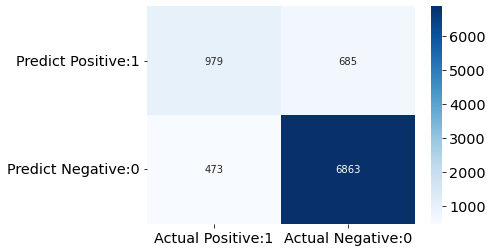

In [104]:
# seaborn heatmaps are used to visualise the confusion matrix
confusionmatrix_matrix = pd.DataFrame(data=confusionmatrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(confusionmatrix_matrix, annot=True, fmt='d', cmap='Blues')

In [105]:
# 10-Fold Cross Validation is applied 
from sklearn.model_selection import cross_val_score
sc = cross_val_score(gaussian, X_train, y_train, cv = 10, scoring='accuracy')
print('cross-validation-scores:{}'.format(sc))
# cross-validation score average is calculated
print('Average cross-validation score: {:.2f}'.format(sc.mean()))

cross-validation-scores:[0.87238095 0.89047619 0.85428571 0.8647619  0.84809524 0.86142857
 0.85380952 0.85285714 0.86898523 0.85278704]
Average cross-validation score: 0.86


In [107]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
boost = XGBClassifier()
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.30)
label = LabelEncoder()
ytrain = label.fit_transform(ytrain)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 
boost.fit(xtrain, ytrain)
sc = cross_val_score(boost, xtrain, ytrain, cv=5)
print("mean cross-validation-score: %.2f" % sc.mean())
k = KFold(n_splits=10, shuffle=True)
k_cv = cross_val_score(boost, xtrain, ytrain, cv=k )
print("k-fold cv-average-score: %.2f" % k_cv.mean())
yprediction = boost.predict(xtest)
print('model-accuracy-score: {0:0.2f}'. format(accuracy_score(ytest, yprediction)))
print(classification_report(ytest, yprediction))
confusionmatrix = confusion_matrix(ytest,yprediction) 
print(confusionmatrix)

mean cross-validation-score: 1.00
k-fold cv-average-score: 1.00
model-accuracy-score: 1.00
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1720
           1       1.00      1.00      1.00      7280

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000

[[1705   15]
 [   7 7273]]
